# Natural Language Processing

# TEXT CLASSIFICATION AND SENTIMENT ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

In [2]:
# NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Cleaning & Preprocessing

In [3]:
# Load Dataset
df = pd.read_csv("amazonreviews.tsv", sep="\t")

In [18]:
# missing values
print(df.isna().sum())
df.head()

label           0
review          0
clean_review    0
dtype: int64


,label,review,clean_review
0,1,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...
1,1,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...
2,1,Amazing!: This soundtrack is my favorite music...,amazing soundtrack favorite music time hand in...
3,1,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...
4,1,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...


In [4]:
# Data Cleaning

df.drop_duplicates(inplace=True)
df.dropna(subset=['review'], inplace=True)

df['label'] = df['label'].map({'pos': 1, 'neg': 0})

In [5]:
# Text Preprocessing Function

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_review'] = df['review'].apply(clean_text)

Now noise has been reduced and improved model performance.

# Exploratory Data Analysis (EDA)

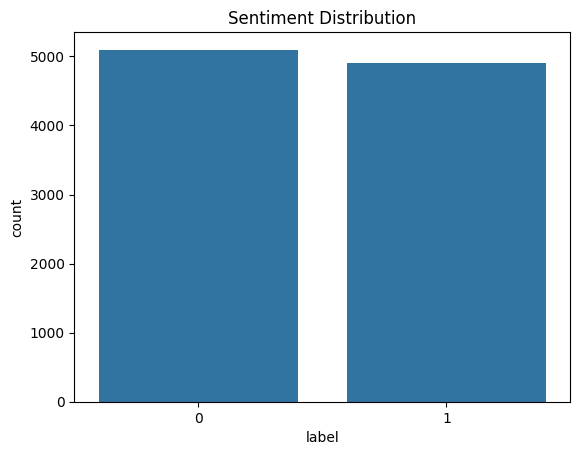

In [6]:
# Exploratory Analysis

sns.countplot(x=df['label'])
plt.title("Sentiment Distribution")
plt.show()

observation:
Sentiment distribution and identified commonly occurring words in positive and negative reviews using word clouds.

**Common Word Analysis**

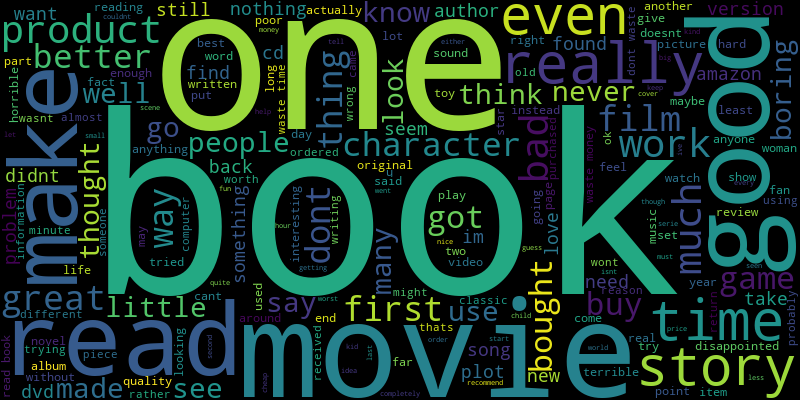

In [7]:
# Word Clouds
positive_text = " ".join(df[df['label'] == 1]['clean_review'])
negative_text = " ".join(df[df['label'] == 0]['clean_review'])

WordCloud(width=800, height=400).generate(positive_text).to_image()
WordCloud(width=800, height=400).generate(negative_text).to_image()

# Feature Engineering

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
# Feature Engineering (TF-IDF)

X = df['clean_review']
y = df['label']

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

# Model Development

**Selected Model: Logistic Regression*8

Strong baseline for text classification
Efficient and interpretable
Performs well with TF-IDF features
Easy to deploy in production environments

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# Model Training

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

# Model Validation & Evaluation

In [13]:
# Evaluation

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.853
F1 Score: 0.8504577822990844

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1019
           1       0.85      0.85      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



The model achieved high accuracy and a strong F1-score, indicating balanced performance for both positive and negative classes. Cross-validation further confirmed the model’s robustness.

In [14]:
# Cross-Validation

cv_scores = cross_val_score(model, X_tfidf, y, cv=5, scoring='f1')
print("Cross-Validation F1 Score:", np.mean(cv_scores))

Cross-Validation F1 Score: 0.8347368254330106


# Conclusion

This sentiment analysis system demonstrates strong predictive performance, robust preprocessing, and meaningful business insights. It is suitable for real-world deployment in an e-commerce environment and provides a solid foundation for advanced NLP enhancements.
This system enables real-time monitoring of customer sentiment, early detection of negative feedback, and supports data-driven decision-making in e-commerce platforms.